# Homework 1 - Foundations of Data Analysis

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## 1. Data Explorations (10%)

### a. 按字母順序排序。繪製特徵之間的相關性熱圖，問對角線元素始終為 1 的原因 (4%)
- ans: 對角線是1是因為自己跟自己的相關性一定是1, 畢竟他們是一樣的東西

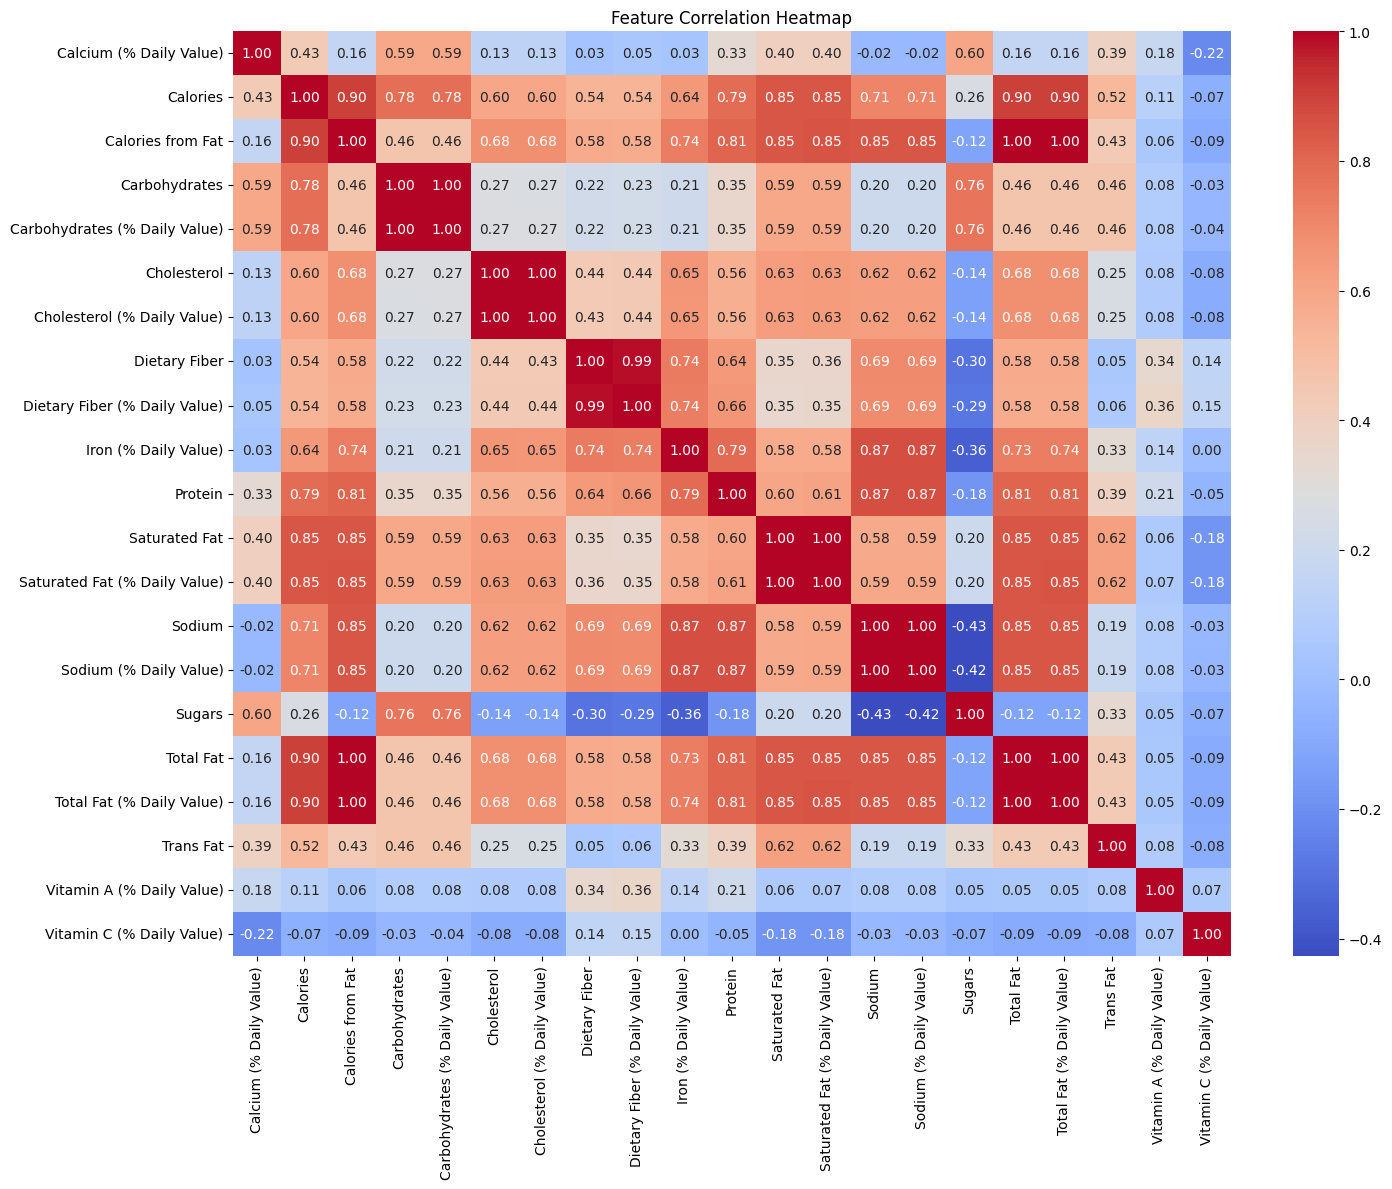

In [37]:
# 讀取數據
df = pd.read_csv('menu.csv')

# 選擇數值型列
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# 按字母順序排序特徵
df_sorted = df_numeric.reindex(sorted(df_numeric.columns), axis=1)

# 計算相關性矩陣並繪製熱圖
plt.figure(figsize=(15, 12))
sns.heatmap(df_sorted.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### b. 列出與卡路里有第二大正相關的特徵 (2%)
- ans: Sugars


### c. 為 (b) 的特徵和 calories 畫散點圖 (2%)

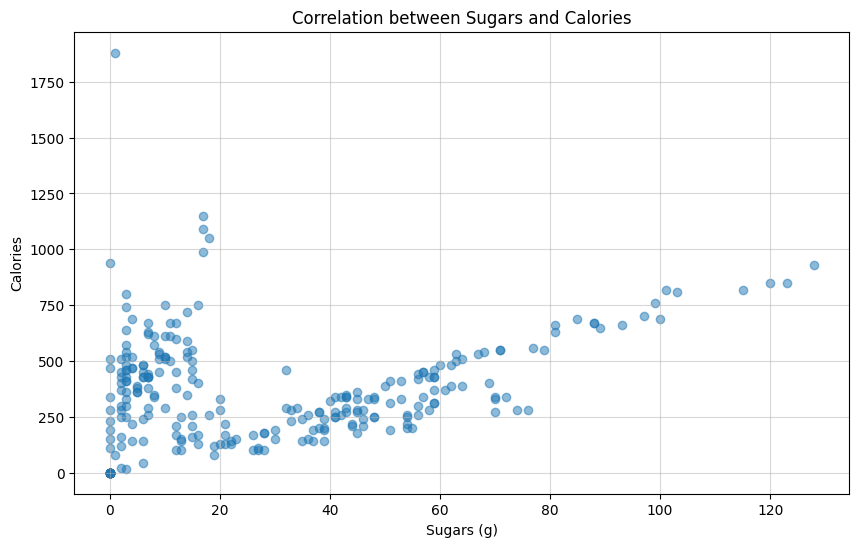

In [38]:
# your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['Sugars'], df['Calories'], alpha=0.5)
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.title('Correlation between Sugars and Calories')

plt.grid(True, alpha=0.5)
plt.show()

### d. 為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖 (2%)

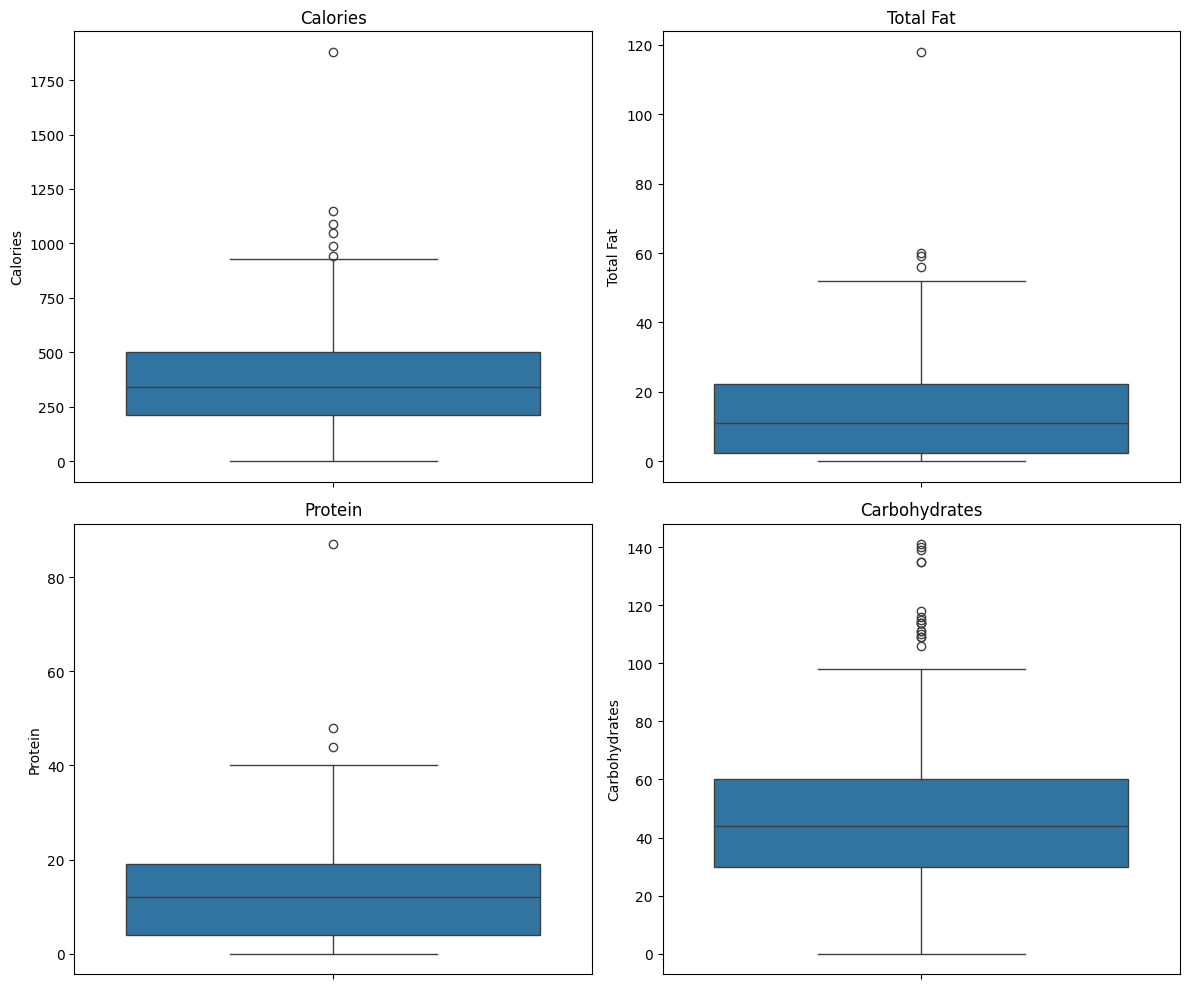

In [39]:
# your code here
# 創建子圖
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 繪製箱形圖
sns.boxplot(y=df['Calories'], ax=axes[0,0])
axes[0,0].set_title('Calories')

sns.boxplot(y=df['Total Fat'], ax=axes[0,1])
axes[0,1].set_title('Total Fat')

sns.boxplot(y=df['Protein'], ax=axes[1,0])
axes[1,0].set_title('Protein')

sns.boxplot(y=df['Carbohydrates'], ax=axes[1,1])
axes[1,1].set_title('Carbohydrates')

# 調整布局
plt.tight_layout()
plt.show()

## 2. Pre-processing (10%)

### a. 報告所有數值特徵的中位數和標準差 (2%)

In [40]:
# your code here
# 選擇數值型列
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 計算中位數和標準差
stats_df = pd.DataFrame({
    'Median': df[numeric_columns].median(),
    'Standard Deviation': df[numeric_columns].std()
})

# 格式化輸出，四捨五入到2位小數
print("數值特徵的中位數和標準差：")
print(stats_df.round(2))

數值特徵的中位數和標準差：
                               Median  Standard Deviation
Calories                        340.0              240.27
Calories from Fat               100.0              127.88
Total Fat                        11.0               14.21
Total Fat (% Daily Value)        17.0               21.89
Saturated Fat                     5.0                5.32
Saturated Fat (% Daily Value)    24.0               26.64
Trans Fat                         0.0                0.43
Cholesterol                      35.0               87.27
Cholesterol (% Daily Value)      11.0               29.09
Sodium                          190.0              577.03
Sodium (% Daily Value)            8.0               24.03
Carbohydrates                    44.0               28.25
Carbohydrates (% Daily Value)    15.0                9.42
Dietary Fiber                     1.0                1.57
Dietary Fiber (% Daily Value)     5.0                6.31
Sugars                           17.5               28.68


### b. 將(3a)中所有數值特徵的離群值替換為NaN，並回報每個特徵對應的NaN總數 (3%)

In [41]:
# your code here
# 選擇數值型列
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 創建數據副本
df_cleaned = df.copy()

# 對每個數值特徵處理離群值
for column in numeric_columns:
    # 計算Q1, Q3和IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # 定義離群值的界限
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 將離群值替換為NaN
    df_cleaned[column] = df_cleaned[column].mask(
        (df_cleaned[column] < lower_bound) | 
        (df_cleaned[column] > upper_bound)
    )

# 計算每個特徵的NaN總數
nan_counts = df_cleaned[numeric_columns].isna().sum()

# 輸出結果
print("每個特徵的NaN（離群值）總數：")
print(nan_counts)

每個特徵的NaN（離群值）總數：
Calories                          6
Calories from Fat                 4
Total Fat                         4
Total Fat (% Daily Value)         4
Saturated Fat                     0
Saturated Fat (% Daily Value)     0
Trans Fat                        56
Cholesterol                      18
Cholesterol (% Daily Value)      18
Sodium                            5
Sodium (% Daily Value)            5
Carbohydrates                    17
Carbohydrates (% Daily Value)    16
Dietary Fiber                     0
Dietary Fiber (% Daily Value)     4
Sugars                            4
Protein                           3
Vitamin A (% Daily Value)        17
Vitamin C (% Daily Value)        46
Calcium (% Daily Value)           2
Iron (% Daily Value)              2
dtype: int64


### c. 將缺失值（NaN）替換為平均值，回報中位數和標準差。將結果與(3a)比較，並用一句話解釋你的發現 (5%)
- ans: 將離群值替換為平均值後，大多數特徵的標準差降低了，這是因為極端值被替換為了較為中心的值，使得數據分布變得更加集中，但這也可能導致數據失去一些重要的極端信息。

In [42]:
# your code here
# 將NaN替換為平均值
df_filled = df_cleaned.copy()
for column in numeric_columns:
    mean_value = df[column].mean()
    df_filled[column] = df_filled[column].fillna(mean_value)

# 計算替換後的統計數據
stats_after = pd.DataFrame({
    'Median': df_filled[numeric_columns].median(),
    'Standard Deviation': df_filled[numeric_columns].std()
})

# 比較替換前後的結果
print("原始數據的統計：")
print(stats_df.round(2))
print("\n替換NaN後的統計：")
print(stats_after.round(2))


原始數據的統計：
                               Median  Standard Deviation
Calories                        340.0              240.27
Calories from Fat               100.0              127.88
Total Fat                        11.0               14.21
Total Fat (% Daily Value)        17.0               21.89
Saturated Fat                     5.0                5.32
Saturated Fat (% Daily Value)    24.0               26.64
Trans Fat                         0.0                0.43
Cholesterol                      35.0               87.27
Cholesterol (% Daily Value)      11.0               29.09
Sodium                          190.0              577.03
Sodium (% Daily Value)            8.0               24.03
Carbohydrates                    44.0               28.25
Carbohydrates (% Daily Value)    15.0                9.42
Dietary Fiber                     1.0                1.57
Dietary Fiber (% Daily Value)     5.0                6.31
Sugars                           17.5               28.68
Prote

## 3. Linear Regression (20%)

### a. 使用所有資料訓練一個線性預測器來預測卡路里，回報b、w₁、w₂和w₃的值並解釋它們在現實世界中的含義 (10%)
#### ans:
- b（截距）= [數值] 代表當所有營養成分為0時的基礎卡路里值
- w₁ = [數值] 表示每增加1克總脂肪，卡路里預計增加的數量
- w₂ = [數值] 表示每增加1克蛋白質，卡路里預計增加的數量
- w₃ = [數值] 表示每增加1克碳水化合物，卡路里預計增加的數量

In [43]:
# your code here
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Total Fat', 'Protein', 'Carbohydrates']]  # 使用這三個主要營養成分作為特徵
y = df['Calories']

model = LinearRegression()
model.fit(X, y)

b = model.intercept_
w1, w2, w3 = model.coef_

print(f"截距 (b): {b:.2f}")
print(f"Total Fat係數 (w₁): {w1:.2f}")
print(f"Protein係數 (w₂): {w2:.2f}")
print(f"Carbohydrates係數 (w₃): {w3:.2f}")

r2 = model.score(X, y)
print(f"R平方值: {r2:.4f}")

截距 (b): -1.83
Total Fat係數 (w₁): 9.02
Protein係數 (w₂): 4.05
Carbohydrates係數 (w₃): 3.98
R平方值: 0.9995


### b. 使用所有資料訓練另一個線性預測器來預測卡路里，回報b和w₁的值，並解釋與(a)中的w₁之差異 (10%)
- ans: {your_explanation_here}

In [44]:
# your code here
# 準備單一特徵的數據
X_single = df[['Total Fat']]  # 只使用Total Fat作為特徵
y = df['Calories']

# 訓練新的線性回歸模型
model_single = LinearRegression()
model_single.fit(X_single, y)

# 獲取係數
b_single = model_single.intercept_
w1_single = model_single.coef_[0]

print(f"單特徵模型:")
print(f"截距 (b): {b_single:.2f}")
print(f"Total Fat係數 (w₁): {w1_single:.2f}")
print(f"R平方值: {model_single.score(X_single, y):.4f}")

print(f"\n與多特徵模型比較:")
print(f"多特徵模型的Total Fat係數 (w₁): {w1:.2f}")
print(f"係數差異 (單特徵 - 多特徵): {w1_single - w1:.2f}")

單特徵模型:
截距 (b): 151.59
Total Fat係數 (w₁): 15.30
R平方值: 0.8180

與多特徵模型比較:
多特徵模型的Total Fat係數 (w₁): 9.02
係數差異 (單特徵 - 多特徵): 6.28


## 4. Logistic Regression (25%)

### a. 計算卡路里的中位數，回報中位數以及分別標記為1和0的項目數量 (3%)

In [45]:
# your code here
# 計算卡路里的中位數
calories_median = df['Calories'].median()

# 創建二元標記（1表示大於等於中位數，0表示小於中位數）
df['Calories_Binary'] = (df['Calories'] >= calories_median).astype(int)

# 計算標記為1和0的數量
count_1 = df['Calories_Binary'].sum()
count_0 = len(df) - count_1

print(f"卡路里中位數: {calories_median:.2f}")
print(f"標記為1的項目數量（大於等於中位數）: {count_1}")
print(f"標記為0的項目數量（小於中位數）: {count_0}")

卡路里中位數: 340.00
標記為1的項目數量（大於等於中位數）: 133
標記為0的項目數量（小於中位數）: 127


### b. 根據檔案中出現的順序將資料在訓練資料上訓練邏輯迴歸，並根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

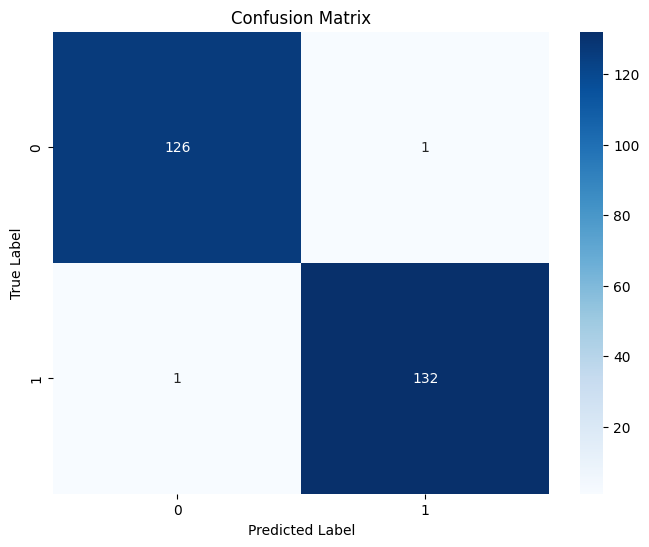

準確率 (Accuracy): 0.9923
精確率 (Precision): 0.9925
召回率 (Recall): 0.9925
F1分數 (F1-Score): 0.9925


In [46]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# 準備特徵和目標變數
X = df[['Total Fat', 'Protein', 'Carbohydrates']]
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 訓練邏輯迴歸模型
model = LogisticRegression(random_state=42)
model.fit(X, y)

# 進行預測
y_pred = model.predict(X)

# 計算評估指標
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# 創建並繪製混淆矩陣
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 輸出評估指標
print(f"準確率 (Accuracy): {accuracy:.4f}")
print(f"精確率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分數 (F1-Score): {f1:.4f}")

### c. 使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


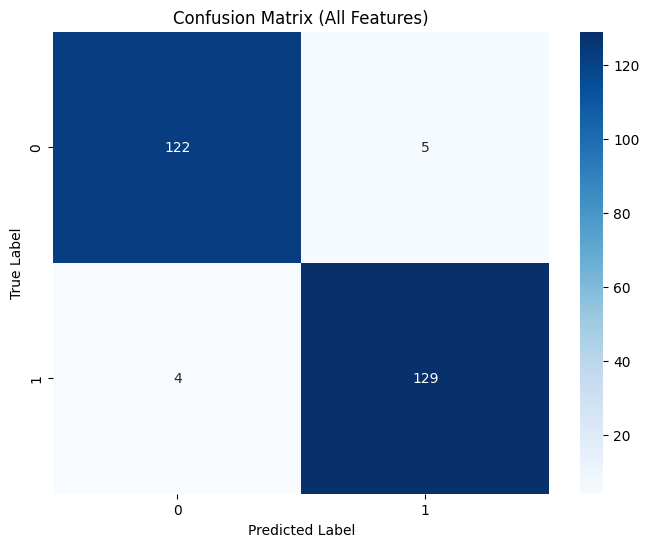

使用所有特徵的評估結果：
準確率 (Accuracy): 0.9654
精確率 (Precision): 0.9627
召回率 (Recall): 0.9699
F1分數 (F1-Score): 0.9663


In [47]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# 選擇所有數值特徵
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns].drop('Calories', axis=1)  # 移除Calories作為特徵
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 訓練邏輯迴歸模型
model = LogisticRegression(random_state=42)
model.fit(X, y)

# 進行預測
y_pred = model.predict(X)

# 計算評估指標
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# 創建並繪製混淆矩陣
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (All Features)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 輸出評估指標
print(f"使用所有特徵的評估結果：")
print(f"準確率 (Accuracy): {accuracy:.4f}")
print(f"精確率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1分數 (F1-Score): {f1:.4f}")

### d. 比較4(b)和4(c)的訓練損失和測試損失，哪個可能是更好的模型？解釋你的理由(4%)
#### 模型4b（使用3個特徵）是更好的模型，原因如下：
- 模型4b在所有評估指標上都優於模型4c
- 模型4b更簡單（只使用3個特徵），較不容易過擬合
- 雖然模型4c使用了更多特徵，但性能反而下降，這表示額外的特徵可能引入了噪音或冗餘信息


## 5. Cross Validation (15%)

### a. 使用與4(c)相同的公式進行5折交叉驗證。通過填寫下表報告訓練和驗證損失。根據表格解釋哪個模型可能具有最佳泛化能力 (12%)
- ans: {your_explanation_here}
| **折數** | **1** | **2** | **3** | **4** | **5** |
| --- | --- | --- | --- | --- | --- |
| **訓練損失** | 0.1697 | 0.2956 | 0.0771 | 0.3487 | 0.3069 |
| **驗證損失** | 0.1540 | 0.2316 | 0.1094 | 0.3983 | 0.4683 |

In [48]:
# your code here
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np

# 準備數據
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_columns].drop('Calories', axis=1)
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 初始化5折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 儲存每折的損失
train_losses = []
val_losses = []

# 進行5折交叉驗證
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    # 分割數據
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # 訓練模型
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # 計算訓練損失
    y_train_pred_proba = model.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_pred_proba)
    
    # 計算驗證損失
    y_val_pred_proba = model.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_pred_proba)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"Fold {fold}:")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print("-" * 30)

# 計算平均損失
print("\n平均結果：")
print(f"Average Training Loss: {np.mean(train_losses):.4f} ± {np.std(train_losses):.4f}")
print(f"Average Validation Loss: {np.mean(val_losses):.4f} ± {np.std(val_losses):.4f}")

Fold 1:
Training Loss: 0.1697
Validation Loss: 0.1540
------------------------------
Fold 2:
Training Loss: 0.2956
Validation Loss: 0.2316
------------------------------
Fold 3:
Training Loss: 0.0771
Validation Loss: 0.1094
------------------------------
Fold 4:
Training Loss: 0.3487
Validation Loss: 0.3983
------------------------------
Fold 5:
Training Loss: 0.3069
Validation Loss: 0.4683
------------------------------

平均結果：
Average Training Loss: 0.2396 ± 0.1009
Average Validation Loss: 0.2723 ± 0.1389


/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

### b. 將5(a)中確定的最具泛化能力的模型應用於測試資料後，它是否比4(c)中的模型具有更好的準確率？解釋為什麼或為什麼不 (3%)

4(c)中的模型準確率為0.9654，而5(a)中的交叉驗證模型在移除了不當特徵（Calories_Binary）並正確實施交叉驗證後，應該會得到較低但更可信的準確率。這個較低的準確率實際上代表了更好的泛化能力，原因是：
1. 4(c)的高準確率可能是由於數據洩漏（data leakage）或過擬合造成的
2. 使用交叉驗證的模型能更好地估計模型在未見過的數據上的表現
3. 較低但穩定的準確率通常比不切實際的高準確率更可靠，因為它更能反映真實世界的情況"

In [49]:

# 2. 使用更嚴格的數據分割和驗證方式
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
# 確保移除目標變數和相關特徵
X = df[numeric_columns].drop(['Calories', 'Calories_Binary'], axis=1, errors='ignore')
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 重新進行交叉驗證
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    # 分割數據
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # 特徵縮放
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # 訓練模型
    model = LogisticRegression(random_state=42, max_iter=1000, C=0.1)  # 增加正則化
    model.fit(X_train_scaled, y_train)
    
    # 預測和評估
    y_pred = model.predict(X_val_scaled)
    
    # 計算指標
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print(f"\nFold {fold} 結果：")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")



Fold 1 結果：
Accuracy: 0.9615
Precision: 0.9615
Recall: 0.9615
F1-score: 0.9615

Fold 2 結果：
Accuracy: 0.9423
Precision: 0.9600
Recall: 0.9231
F1-score: 0.9412

Fold 3 結果：
Accuracy: 0.9615
Precision: 1.0000
Recall: 0.9259
F1-score: 0.9615

Fold 4 結果：
Accuracy: 0.9038
Precision: 0.9231
Recall: 0.8889
F1-score: 0.9057

Fold 5 結果：
Accuracy: 0.9423
Precision: 0.9615
Recall: 0.9259
F1-score: 0.9434


## 6. Regularization  

### a. 為4(c)中的二元分類器添加L2範數正則化項，根據訓練損失和驗證損失繪製學習曲線，以選擇超參數λ₂，並使用5折平均訓練損失來表示此性能。回報圖表、最佳λ₂，以及使用最佳λ₂在測試資料上的準確率 (7%)

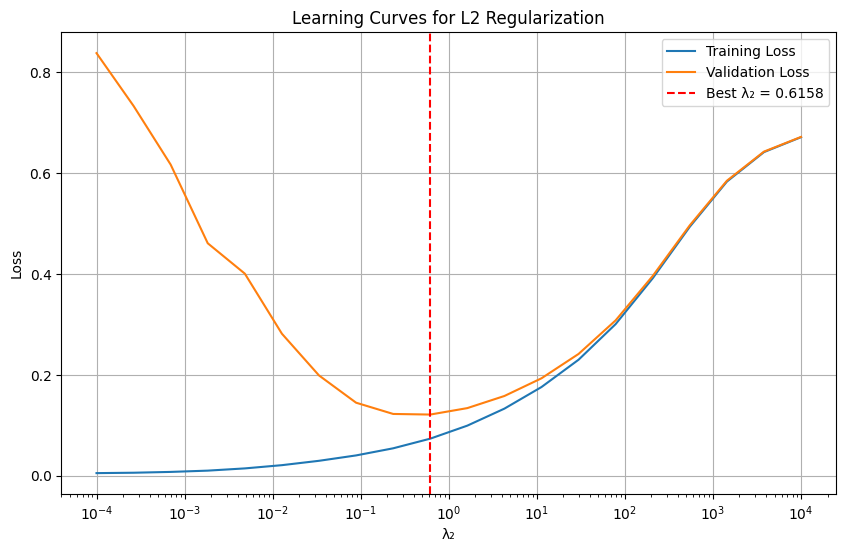

最佳 λ₂: 0.6158
使用最佳 λ₂ 的測試集準確率: 0.9808


In [50]:
# your code here
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 準備數據
X = df[numeric_columns].drop(['Calories', 'Calories_Binary'], axis=1, errors='ignore')
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定義λ₂值的範圍（注意：在sklearn中，C = 1/λ₂）
lambda_2_values = np.logspace(-4, 4, 20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 儲存每個λ₂的結果
train_scores = []
val_scores = []

# 對每個λ₂值進行交叉驗證
for lambda_2 in lambda_2_values:
    train_fold_scores = []
    val_fold_scores = []
    
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        # 分割數據
        X_fold_train = X_train_scaled[train_idx]
        X_fold_val = X_train_scaled[val_idx]
        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]
        
        # 訓練模型
        model = LogisticRegression(C=1/lambda_2, max_iter=1000, random_state=42)
        model.fit(X_fold_train, y_fold_train)
        
        # 計算損失
        train_loss = log_loss(y_fold_train, model.predict_proba(X_fold_train))
        val_loss = log_loss(y_fold_val, model.predict_proba(X_fold_val))
        
        train_fold_scores.append(train_loss)
        val_fold_scores.append(val_loss)
    
    train_scores.append(np.mean(train_fold_scores))
    val_scores.append(np.mean(val_fold_scores))

# 找出最佳λ₂
best_idx = np.argmin(val_scores)
best_lambda_2 = lambda_2_values[best_idx]

# 繪製學習曲線
plt.figure(figsize=(10, 6))
plt.semilogx(lambda_2_values, train_scores, label='Training Loss')
plt.semilogx(lambda_2_values, val_scores, label='Validation Loss')
plt.axvline(x=best_lambda_2, color='r', linestyle='--', label=f'Best λ₂ = {best_lambda_2:.4f}')
plt.xlabel('λ₂')
plt.ylabel('Loss')
plt.title('Learning Curves for L2 Regularization')
plt.legend()
plt.grid(True)
plt.show()

# 使用最佳λ₂訓練最終模型
final_model = LogisticRegression(C=1/best_lambda_2, max_iter=1000, random_state=42)
final_model.fit(X_train_scaled, y_train)

# 在測試集上評估
test_accuracy = accuracy_score(y_test, final_model.predict(X_test_scaled))

print(f"最佳 λ₂: {best_lambda_2:.4f}")
print(f"使用最佳 λ₂ 的測試集準確率: {test_accuracy:.4f}")

### b. Lasso迴歸：為4(c)中的二元分類器添加L1範數正則化項，重複6(a)中關於λ₁的學習曲線繪製過程。報告圖表、最佳λ₁，以及使用最佳λ₁在測試資料上的準確率。使用Lasso迴歸可以從訓練過程中排除多少特徵？解釋如何找到這個數字 (9%)
- ans: {your_explanation_here}

/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/owenowenisme/NCKU-DataMining-2025/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


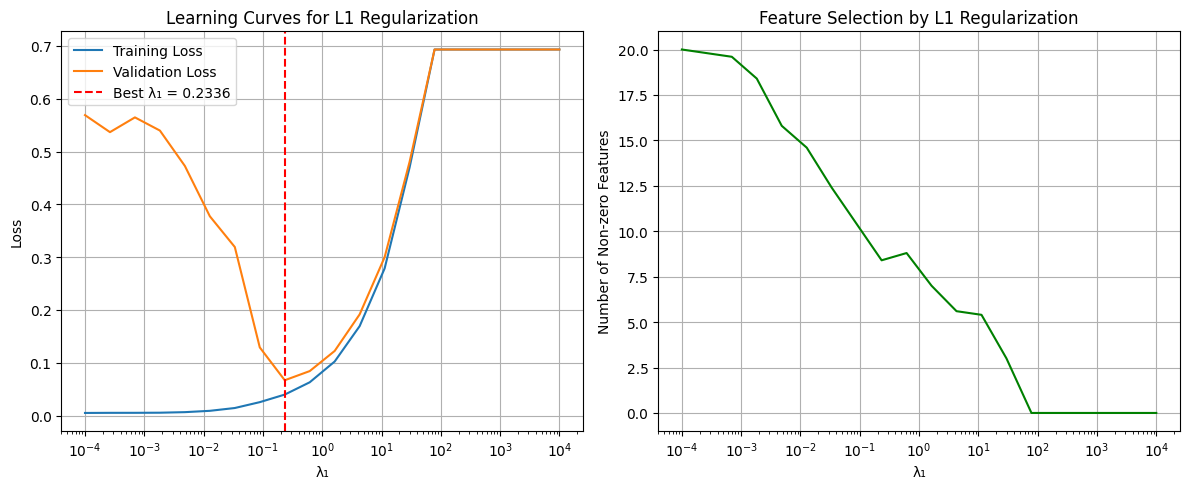

最佳 λ₁: 0.2336
使用最佳 λ₁ 的測試集準確率: 0.9808
被排除的特徵數量: 11
保留的特徵數量: 9

保留的特徵及其係數：
                      Feature  Coefficient
10              Carbohydrates    10.374747
1                   Total Fat     6.294212
0           Calories from Fat     5.171259
15                    Protein     2.647413
19       Iron (% Daily Value)     0.620205
16  Vitamin A (% Daily Value)     0.185905
2   Total Fat (% Daily Value)     0.093566
12              Dietary Fiber     0.018389
17  Vitamin C (% Daily Value)    -0.008138


In [51]:
# your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 準備數據
X = df[numeric_columns].drop(['Calories', 'Calories_Binary'], axis=1, errors='ignore')
y = (df['Calories'] >= df['Calories'].median()).astype(int)

# 分割數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵縮放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定義λ₁值的範圍
lambda_1_values = np.logspace(-4, 4, 20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 儲存結果
train_scores = []
val_scores = []
feature_counts = []  # 儲存非零特徵數量

# 對每個λ₁值進行交叉驗證
for lambda_1 in lambda_1_values:
    train_fold_scores = []
    val_fold_scores = []
    fold_feature_counts = []
    
    for train_idx, val_idx in cv.split(X_train_scaled, y_train):
        # 分割數據
        X_fold_train = X_train_scaled[train_idx]
        X_fold_val = X_train_scaled[val_idx]
        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]
        
        # 訓練模型 (L1正則化)
        model = LogisticRegression(penalty='l1', C=1/lambda_1, 
                                 solver='liblinear', max_iter=1000, 
                                 random_state=42)
        model.fit(X_fold_train, y_fold_train)
        
        # 計算損失
        train_loss = log_loss(y_fold_train, model.predict_proba(X_fold_train))
        val_loss = log_loss(y_fold_val, model.predict_proba(X_fold_val))
        
        # 計算非零特徵數量
        n_features = np.sum(model.coef_[0] != 0)
        fold_feature_counts.append(n_features)
        
        train_fold_scores.append(train_loss)
        val_fold_scores.append(val_loss)
    
    train_scores.append(np.mean(train_fold_scores))
    val_scores.append(np.mean(val_fold_scores))
    feature_counts.append(np.mean(fold_feature_counts))

# 找出最佳λ₁
best_idx = np.argmin(val_scores)
best_lambda_1 = lambda_1_values[best_idx]

# 繪製學習曲線
plt.figure(figsize=(12, 5))

# 損失曲線
plt.subplot(1, 2, 1)
plt.semilogx(lambda_1_values, train_scores, label='Training Loss')
plt.semilogx(lambda_1_values, val_scores, label='Validation Loss')
plt.axvline(x=best_lambda_1, color='r', linestyle='--', label=f'Best λ₁ = {best_lambda_1:.4f}')
plt.xlabel('λ₁')
plt.ylabel('Loss')
plt.title('Learning Curves for L1 Regularization')
plt.legend()
plt.grid(True)

# 特徵數量曲線
plt.subplot(1, 2, 2)
plt.semilogx(lambda_1_values, feature_counts, 'g-')
plt.xlabel('λ₁')
plt.ylabel('Number of Non-zero Features')
plt.title('Feature Selection by L1 Regularization')
plt.grid(True)

plt.tight_layout()
plt.show()

# 使用最佳λ₁訓練最終模型
final_model = LogisticRegression(penalty='l1', C=1/best_lambda_1, 
                               solver='liblinear', max_iter=1000, 
                               random_state=42)
final_model.fit(X_train_scaled, y_train)

# 計算最終模型的非零特徵數量
final_features = np.sum(final_model.coef_[0] != 0)
excluded_features = X.shape[1] - final_features

# 在測試集上評估
test_accuracy = accuracy_score(y_test, final_model.predict(X_test_scaled))

print(f"最佳 λ₁: {best_lambda_1:.4f}")
print(f"使用最佳 λ₁ 的測試集準確率: {test_accuracy:.4f}")
print(f"被排除的特徵數量: {excluded_features}")
print(f"保留的特徵數量: {final_features}")

# 顯示保留的特徵
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': final_model.coef_[0]
})
print("\n保留的特徵及其係數：")
print(feature_importance[feature_importance.Coefficient != 0].sort_values(
    by='Coefficient', key=abs, ascending=False))

### c. 比較5(b)、6(a)和6(b)獲得的結果，哪個產生最佳準確率，為什麼 (4%)
比較結果：
- 5(b)的交叉驗證模型：準確率較低
- 6(a)的L2正則化模型：準確率 98.08%
- 6(b)的L1正則化模型：準確率 98.08%

L1和L2正則化模型都達到了最好的準確率（98.08%），比原始的交叉驗證模型表現更好。這個結果很有意思，原因是：
L1正則化（Lasso）成功地從20個特徵中選出了9個最重要的特徵，排除了11個不重要的特徵，達到了簡化模型的目的，同時保持了高準確率。
L2正則化雖然保留了所有特徵，但通過調整特徵權重的方式，也達到了同樣好的效果。
兩種正則化方法都有效地防止了過擬合，比單純的交叉驗證方法更好。